# Ice VideoGames Sales Online

## Sales patterns analysis in different countries.

# Indice de Contenidos

### Paso 1. Inicialización y carga de datos.
### Paso 2. Preparación de los datos.
### Paso 3. Análisis de los datos.
### Paso 4. Perfil de usuario para cada región.
### Paso 5. Pruebas de hipótesis.
### Paso 6. Conclusión General.

# Paso 1. Inicialización y carga de datos. 

Importar Librerías:

In [74]:
# Cargamos todas las librerías que ocuparemos en el proyecto:
import pandas as pd # importamos las librerías de pandas
from matplotlib import pyplot as plt # importamos las librerías pyplot de Matplotlib
import numpy as np # importamos la librerías de NumPy, se usa para funciones matemáticas complejas
from scipy import stats as st # importamos el módulo stats de la librería SciPy.
import seaborn as sns # importamos la librería Seaborn para realizar unos gráficos

Leer el Conjunto de Datos con la información de los videojuegos:

In [75]:
# Cargamos el DataFrame:
games = pd.read_csv('/datasets/games.csv') #cargamos el DataFrame games con la información sobre los videojuegos.

Mostrar informacion general sobre el Conjunto de Datos:

In [76]:
# Imprimimos la información general/resumida sobre el DataFrame de los videojuegos
games.info() # llamamos al parámetro info para conocer la información general/resumida del DataFrame.
print('----------')
print(games.head()) # imprimimos las primeras líneas para ver el conjunto de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
----------
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform 

Conslusiones Paso 1: Vemos que tenemos un conjunto de datos con información sobre los videojuegos. El conjunto de datos se forma por 10 columnas iniciales, en las cuales tenemos el nombre, la plataforma, el año de lanzamiento y el género de cada videojuego. Además nos proporcina información sobre las ventas de cada videojuego en NorteAmérica (NA), Europa(EU), Japón(JP) y otros países e información sobre la evaluación de los videojuegos. 
Al revisar la cantidad de filas, vemos que al parecer tenemos presencia de valors ausentes en varias columnas, lo cual lo analizaremos en el siguiente paso.

# Paso 2. Preparación de los datos.

Se pasan a minúsculas todos los nombres de las columnas.

In [77]:
print(games.columns) # A modo de información, primero mostramos los nombres actuales que tienen mayúsculas.
print('--------------------')

#Luego pasamos los nombres a minúsculas ocupando un bloque for:
new_col_names = []
for old_name in games.columns:
    name_lowered = old_name.lower() # con el método lowered pasamos todas las columnas a minúsculas
    new_col_names.append(name_lowered)
games.columns = new_col_names
print(games.columns) # comprobamos el resultado realizando un print con el método columns.

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
--------------------
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Verificamos si hay filas totalmente duplicadas.

In [78]:
# Verificamos si hay filas totalmente duplicadas
print('El número de filas totalmente duplicadas es:')
print(games.duplicated().sum()) # verificamos si hay filas duplicadas.

El número de filas totalmente duplicadas es:
0


Vamos a revisar los tipos de datos que tenemos en cada columna, para confirmar si es necesario modificar el tipo de alguna columna.

In [79]:
# Primero recordamos la información sobre el DataFrame de los videojuegos ocupando el parámetro info().
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Al revisar los tipos de la columnas, encontramos que es necesario modificar el tipo de la columna "user_score", debido a que tiene un tipo object, y debiera tener un tipo float64 porque esta clasificación está compuesta por números de 0 a 10. Ahora, debemos tener cuidado porque en esta columna se encuentran algunos valores con la sigla "tbd" significa "to be determined" (a determinar). Para ello cuando realizemos el cambio de tipo, ocuparemos el parámetro errors='coerce', que convierte los valores no numéricos a NaN.

In [80]:
# Para confirmar primero veremos los elementos que encontramos en la columna "user_score":
games_sort = games.sort_values(by='user_score') # primero ordenar la columna por orden alfabético
games_unique = games_sort['user_score'].unique() #luego generamos una lista de los elementos únicos de "user_score"
print(games_unique) # imprimir la lista de elementos únicos.

['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]


In [81]:
# Ahora a modo de información, vamos a determianr el número de filas que tienen el valor "tbd". 
# Filtramos las filas donde 'user_score' es igual a "tbd"
tbd_rows = games[games['user_score'] == 'tbd']
# Contamos cuántas filas tienen el valor 'tbd' en 'user_score'
tbd_count = tbd_rows.shape[0]
# Mostramos el número de filas con 'tbd' en 'user_score'
print("Número de filas con 'tbd' en 'user_score':", tbd_count)

Número de filas con 'tbd' en 'user_score': 2424


In [82]:
# Finalmente convertimos la columna 'user_score' a tipo float64
# utilizando el parámetro errors='coerce', que convierte los valores no numéricos a NaN.
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
# Mostramos los tipos de datos después de la conversión
print(games.dtypes)

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


Ahora vamos a verificar si existen valores ausentes en el conjunto de datos, y vamos a definir como abordamos cada caso.

In [83]:
print(games.isna().sum()) # para conocer los valores ausentes ocupamos usamos el método isna() 
                          # junto con el método sum().

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


Vemos que tenemos 2 valores ausentes en las columnas 'name' y 'genre', 269 valores ausentes en la columna 'year_of_release', y muchos valores ausentes en las columnas de evaluación 'critic_score', 'user_score' y 'rating'.
Primero vamos a abordar los valores ausentes de las columnas 'name' y 'genre'. 

In [84]:
# A modo de información, vamos a filtrar las filas con valores ausentes en la columna 'name'
rows_with_missing_name = games[games['name'].isna()]

# Imprimimos las primeras 2 filas con valores ausentes en la columna 'name'
print(rows_with_missing_name.head(2))

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


In [85]:
# Ahora filtramos las filas con valores ausentes en la columna 'genre'
rows_with_missing_genre = games[games['genre'].isna()]

# Imprimimos las primeras 2 filas con valores ausentes en la columna 'genre'
print(rows_with_missing_genre.head(2))

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


Como estas columnas con valores ausentes en las filas 'name' y 'genre' representan una pequeña parte de los datos y su ausencia no afecta significativamente al análisis, optaremos por eliminar estas filas. Para ello vamos a  utilizar el método dropna() de Pandas. Además vemos que corresponden a las mismas filas con valores ausentes en ambos casos, son las filas 659 y 14244.

In [86]:
#Procedemos a eliminar las filas con valores ausentes de la columna 'name':
games.dropna(subset=['name'], inplace=True)
# Luego reseteamos el índice del DataFrame, para mantener la integridad de los datos.
games.reset_index(drop=True, inplace=True)
# Finalmente verificamos que ya no están esos valores ausentes.
print(games.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64


Ahora vamos a analizar las filas con valores ausentes en la columna 'year_of_release'. 
Primero vamos a filtrar estas filas, para saber si tienen alguna característica especial que debamos considerar.

In [87]:
# Filtramos las filas con valores ausentes en la columna 'year_of_release'
rows_with_missing_year_of_release = games[games['year_of_release'].isna()]

# Imprimimos las primeras 10 filas con valores ausentes en la columna 'year_of_release'
print(rows_with_missing_year_of_release.head(10))

                                            name platform  year_of_release  \
183                              Madden NFL 2004      PS2              NaN   
377                             FIFA Soccer 2004      PS2              NaN   
456                   LEGO Batman: The Videogame      Wii              NaN   
475                   wwe Smackdown vs. Raw 2006      PS2              NaN   
609                               Space Invaders     2600              NaN   
627                                    Rock Band     X360              NaN   
657     Frogger's Adventures: Temple of the Frog      GBA              NaN   
677  LEGO Indiana Jones: The Original Adventures      Wii              NaN   
718                               Call of Duty 3      Wii              NaN   
804                                    Rock Band      Wii              NaN   

         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183     Sports      4.26      0.26      0.01         0.71         

Como los videojuegos con valores ausentes en la columna 'year_of_release' representan una pequeña parte de los datos y su ausencia no afecta significativamente tu análisis (son menos del 2% de los valores del conjunto de datos), vamos a optar por eliminar estas filas. Esto se puede hacer utilizando el método dropna() de Pandas.

In [88]:
#Procedemos a eliminar las filas con valores ausentes de la columna 'year_of_release':
games.dropna(subset=['year_of_release'], inplace=True)
# Luego reseteamos el índice del DataFrame, para mantener la integridad de los datos.
games.reset_index(drop=True, inplace=True)
# Finalmente verificamos que ya no están esos valores ausentes.
print(games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64


Con respecto a los valores ausentes en las filas de evaluación de los juegos, 'critic_score', 'user_score' y 'rating', dejaremos los valores ausentes tal como están. ésto debido a que son evaluaciones y de esa manera sabremos cuales son los videojuegos que no tienen evaluación. Por otro lado su eliminación no es posible porque son demasiadas filas con valores ausentes que serían eliminadas del conjunto de datos, representan en algunos casos más del 50% de las filas. 

Si  durante el desarrollo del proyecto necesitamos realizar un análisis que involucre a estas filas con valores, podremos generar una fila adicional en la cual completemos los valores ausentes con algún valor conocido. Esta decisión la dejaremos pendiente por el momento.

Ahora como parte de la parte de Preparación de los Datos, vamos a proceder a calcular las ventas totales, que corresponden a la suma de las ventas en todas las regiones para cada juego y colocar estos valores en una columna separada que llamaremos 'total_sales'.

In [89]:
# Calculamos las ventas totales y las guardamos en la nueva columna 'total_sales':
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

# Mostramos las primeras filas del DataFrame con la nueva columna 'Total_sales'
print(games[['name', 'total_sales']].head())
print('--------------')
games.info() # llamamos al parámetro info para confirmar la presencia de la column 'total_sales'.

                       name  total_sales
0                Wii Sports        82.54
1         Super Mario Bros.        40.24
2            Mario Kart Wii        35.52
3         Wii Sports Resort        32.77
4  Pokemon Red/Pokemon Blue        31.38
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-

Conclusiones Paso 2: 


Como conclusiones de la etapa de Preparación de los Datos podemos indicar que fueron pasadas a minúsculas todos los nombres de las columnas, se verificó que no existián filas duplicadas, se revisó los tipos de datos que tenemos en cada columna y se pasó a tipo Float64 la columna 'user_score'. 

Con respecto a los valores duplicados, por representar una pequeña parte de los datos y su ausencia no debería afectar significativamente al análisis fueron eliminados los valores ausentes de las filas 'name', 'genre' y 'years_of_release'.

Con respecto a los valores ausentes en las filas de evaluación de los juegos, 'critic_score', 'user_score' y 'rating', fueron dejados los valores ausentes tal como están. ésto debido a que son evaluaciones y de esa manera sabremos cuales son los videojuegos que no tienen evaluación.

Finalmente se agregó una columna con las ventas totales de todos las regiones, la cual utilizaremos en la siguiente etapa de análisis.

En general, podemos ver que no fue necesario realizar cambios muy profundos y que disponemos de un buen conjunto de datos para poder análisis.


In [90]:
# primero volvemos a revisar las columnas con valores ausentes
print(games.isna().sum())
print('---------------------')

# realizadmos una lista de columnas con valores ausentes
columns_with_missing_values = ['critic_score', 'user_score', 'rating']

# Reemplazamos los valores ausentes en cada columna con "Unknown"
for column in columns_with_missing_values:
    games[column].fillna("Unknown", inplace=True)

#Confirmamos que ya no hay columnas con valores ausentes en el conjunto de datos.    
print(games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
total_sales           0
dtype: int64
---------------------
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64


# Paso 3. Análisis de los datos.

Comenzaremos el análisis de datos, revisando la cantidad de juegos lanzados por año. 

Para ello primero realizaremos una tabla de juegos lanzados por año, calcularemos el máximo de juegos lanzados en un año y realizaremos un gráfico para visualizar mejor los resultados.

In [91]:
# Obtenemos la cantidad de juegos lanzados por año y los imprimos una tabla 
games_per_year = games['year_of_release'].value_counts().sort_index()
print(games_per_year)
print('--------------')
# Luego calculamos el máximo de juegos lanzados en un año
max_year = games_per_year.max()
print('el mayor número de videojuegos lanzados en un año es de:', max_year)

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64
--------------
el mayor número de videojuegos lanzados en un año es de: 1427


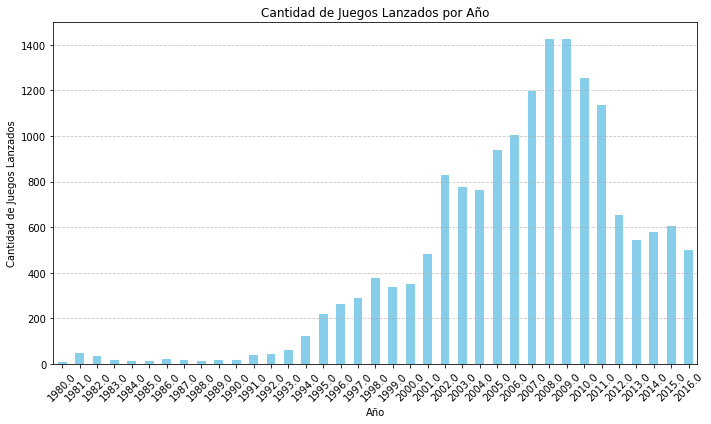

In [92]:
# A continuación creamos un gráfico de barras para visualizar de mejor manera los juegos lanzados por año.
plt.figure(figsize=(10, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Juegos Lanzados por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos Lanzados')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Al revisar los resultados obtenidos de la tabla y gráfico, vemos que los juegos lanzados por año no tienen valores significativos los primeros 20 años (de 1980 al 2000). Recién a partir del año 2001 los juegos lanzados superaron los 400 juegos por año, siendo el año 2008 cuando se alcanzó el máximo de juegos lanzados en un año llegando a 1.427 juegos ese año.

.

Ahora vamos a analizar cómo varían las ventas de una plataforma a otra. Para ello primero calcularemos las ventas totales por plataforma y luego vamos a generar un gráfico de ventas totales por plataforma por año.

In [93]:
# Calculamos las ventas totales para cada plataforma
platform_sales = games.groupby('platform')['total_sales'].sum()

# Ordenamos las plataformas según sus ventas totales en orden descendente
platform_sales_sorted = platform_sales.sort_values(ascending=False)

# Mostramos las plataformas con las mayores ventas totales
print(platform_sales_sorted.head(6))

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
Name: total_sales, dtype: float64


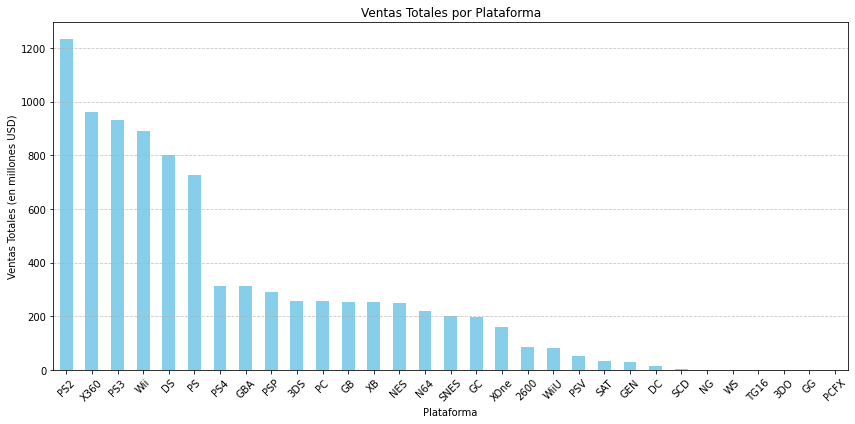

In [94]:
# Creamos un gráfico de barras de las ventas totales por plataforma
plt.figure(figsize=(12, 6))
platform_sales_sorted.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

En relación a las ventas totales, observando el gráfico, podemos dividir las plataformas en 3 grandes grupos. 
Un primer grupo con ventas sobre 700 millones, que corresponden a las plataformas PS2, X360, PS3, Wii, DS y PS.

Luego un segundo grupo con ventas medias, que tienen ventas menores que 700 millones y mayores de 200 millones, 
que corresponden a las  plataformas PS4, GBA, PSP, 3DS, PC, GB, XB, NES, N64 y SNES. 

Luego un grupo de platataformas con ventas bajas (menores de 200 millones) que correspoden a las plataformas 
GC, XOne, 2600, WiiU, PSV, SAT, GEN, DC, SCD, NG y WS. 

Ahora a continuación, para cada uno de estos 3 grupos, vamos a realizar un gráfico de ventas totales por año. 

In [96]:
# Primero confirmamos la clasificación anterior de las plataformas en base a sus ventas:
print('Plataformas Altas Ventas',platform_sales_sorted.head(6))
print('-----------------------------')
print('Plataformas Ventas Medias',platform_sales_sorted.iloc[6:16])
print('-----------------------------')
print('Plataformas Ventas Bajas',platform_sales_sorted.iloc[16:27])
print('-----------------------------')
print('Plataformas Sin Ventas',platform_sales_sorted.iloc[27:31])

Plataformas Altas Ventas platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
Name: total_sales, dtype: float64
-----------------------------
Plataformas Ventas Medias platform
PS4     314.14
GBA     312.88
PSP     289.53
3DS     257.81
PC      255.76
GB      254.43
XB      251.57
NES     251.05
N64     218.01
SNES    200.04
Name: total_sales, dtype: float64
-----------------------------
Plataformas Ventas Bajas platform
GC      196.73
XOne    159.32
2600     86.48
WiiU     82.19
PSV      53.81
SAT      33.59
GEN      28.35
DC       15.95
SCD       1.86
NG        1.44
WS        1.42
Name: total_sales, dtype: float64
-----------------------------
Plataformas Sin Ventas platform
TG16    0.16
3DO     0.10
GG      0.04
PCFX    0.03
Name: total_sales, dtype: float64


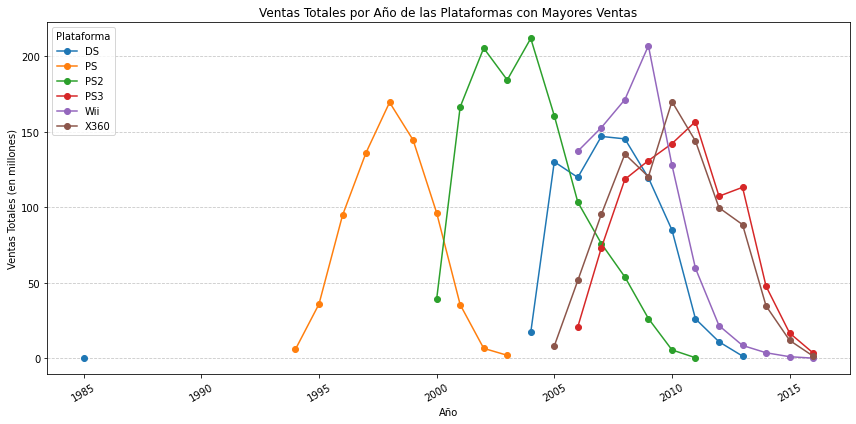

In [97]:
# Luego procedemos a Filtrar los datos para incluir solo las 6 plataformas con ventas mayores ventas totales.
# (Ventas sobre 700 millones de USD)
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
top_platforms_data = games[games['platform'].isin(top_platforms)]

# Agrupamos los datos por año y sumar las ventas totales de cada año para cada plataforma
platforms_sales_per_year = top_platforms_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Creamos un gráfico de líneas
plt.figure(figsize=(12, 6))
for platform in platforms_sales_per_year.columns:
    plt.plot(platforms_sales_per_year.index, platforms_sales_per_year[platform], marker='o', label=platform)

plt.title('Ventas Totales por Año de las Plataformas con Mayores Ventas')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=30)  # Rotar los años 45 grados
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Plataforma', loc='upper left')
plt.tight_layout()
plt.show()

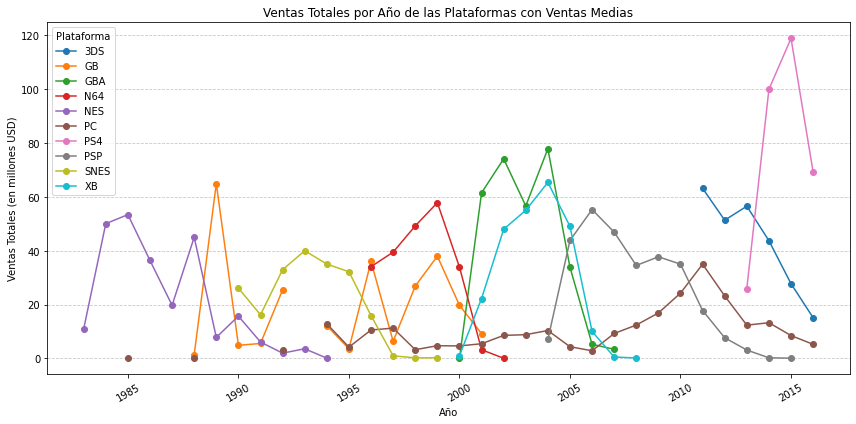

In [98]:
# Filtramos los datos para incluir solo las 6 plataformas con ventas medias 
#(Ventas menores de 700 millones y sobre 200 millones)
med_platforms = ['GBA', 'PS4', 'PSP', 'PC', '3DS', 'XB', 'GB', 'NES', 'N64', 'SNES']
med_platforms_data = games[games['platform'].isin(med_platforms)]

# Agrupamos los datos por año y sumar las ventas totales de cada año para cada plataforma
med_platforms_sales_per_year = med_platforms_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Creamos un gráfico de líneas
plt.figure(figsize=(12, 6))
for platform in med_platforms_sales_per_year.columns:
    plt.plot(med_platforms_sales_per_year.index, med_platforms_sales_per_year[platform], marker='o', label=platform)

plt.title('Ventas Totales por Año de las Plataformas con Ventas Medias')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (en millones USD)')
plt.xticks(rotation=30)  # Rotar los años 45 grados
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Plataforma', loc='upper left')
plt.tight_layout()
plt.show()

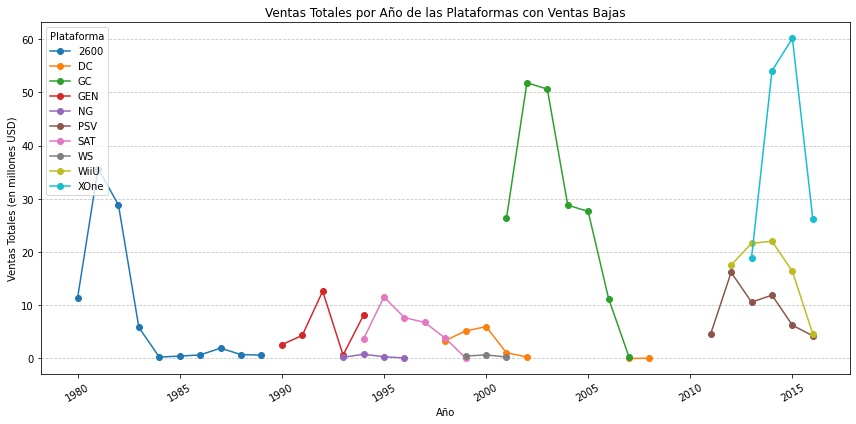

In [99]:
# Filtramos los datos para incluir solo las 6 plataformas con ventas bajas (bajo 200 millones)
low_platforms = ['GC', 'XOne', '2600', 'WiiU', 'PSV', 'SAT', 'GEN', 'DC', 'SDC', 'NG', 'WS']
low_platforms_data = games[games['platform'].isin(low_platforms)]

# Agrupamos los datos por año y sumar las ventas totales de cada año para cada plataforma
low_platforms_sales_per_year = low_platforms_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Creamos un gráfico de líneas
plt.figure(figsize=(12, 6))
for platform in low_platforms_sales_per_year.columns:
    plt.plot(low_platforms_sales_per_year.index, low_platforms_sales_per_year[platform], marker='o', label=platform)

plt.title('Ventas Totales por Año de las Plataformas con Ventas Bajas')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (en millones USD)')
plt.xticks(rotation=30)  # Rotar los años 45 grados
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Plataforma', loc='upper left')
plt.tight_layout()
plt.show()

En relación a las ventas por plataformas, podemos comentar las siguientes conclusiones:
Con respecto al grupo de plataformas con ventas altas, sobre 700 millones, vemos que sus ventas aumentaron y luego decrecieron. Es decir, son en su mayoría plataformas que tuvieron ventas crecientes durante unos 5 años aproximadamente, y luego venta decrecientes durante otros 5 años. Es decir, correspoden a plataformas con años de lanzamiento al mercado dede el año 1994, por ejemplo en el caso de la platadorma PS, con varios años de venta crecientes, llegó a un máximo y luego sus venta disminuyeron. Podemos concluir que para esas plataformas su ciclo de vida fue de 10 años aproximadamente. Este grupo entonces corresponden a plataformas líderes en venta.

Con respecto al grupo de plataformas con ventas medias, podemos ver ciclos similares de venta crecientes y luego decrecientes, pero con venta acumuladas menores a las plataformas de ventas altas, además de que estos ciclos sueles ser más rápidos, es decir duran menos de 10 años en general.

Un caso especial es la plataforma PC que tiene un ciclo un poco distinto, al ver la evoluación de sus venta podemos ver que se ha mantenido en el tiempo, y es probable que este tendencia se mantenga en los próximos años.
También son un caso especial la plataforma PS4, con un año lanzamiento reciente, vemos que probablemente tenga aún algunos años más (después de 2016) de buenas ventas.

Con respecto al grupo de plataformas de baja ventas, vemos que corresponden a plataformas que no consiguieron alcanzar grandes volúmenes de ventas y sus ciclos de venta también son de pocos años. Un caso especial puede ser la plataforma Xone, que al igual que la plataorma PS4 tiene un lanzamiento reciente y puede que tenga algunos años más de venta más allá del año 2016.

En relación a cuales serían las plataformas que pudieran continuar siendo rentables los próximos años, pienso que deberían ser las plataformas que aún están en su ciclo de ventas, como por ejemplo las plataformas PS4, 3DS, PC y Xone. 


Ahora vamos a realizar un diagrama de caja para las ventas globales desglosados por plataforma. Para este análisis solamente vamos a considerar las plataformas con mayores ventas (ventas sobre 700 millones de USD), que corresponden a las plataformas PS2, X360, PS3, Wii, DS, PS.

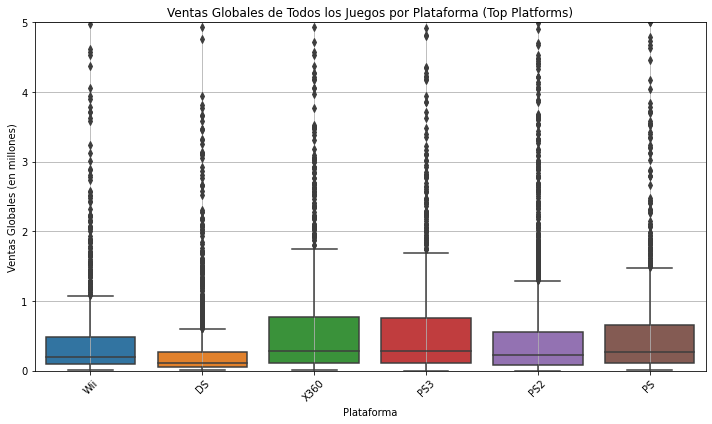

In [100]:
# Filtramos los datos para las plataformas con mayores ventas
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
filtered_data = games[games['platform'].isin(top_platforms)]

# Creamos un diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='platform', y='total_sales')
plt.title('Ventas Globales de Todos los Juegos por Plataforma (Top Platforms)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45)
plt.ylim(0, 5)  # Limitar el rango del eje y
plt.grid(True)
plt.tight_layout()
plt.show()

Con respecto al diagrama de cajas de estas plataformas podemos ver que las medianas son muy similares entre una plataforma y otra. 

Vamos a generar ahora un gráfico con las ventas promedio de estas plataformas.

Ventas Promedio por Plataforma:
platform
X360    0.780227
PS3     0.713124
Wii     0.692986
PS      0.611412
PS2     0.579953
DS      0.378491
Name: total_sales, dtype: float64


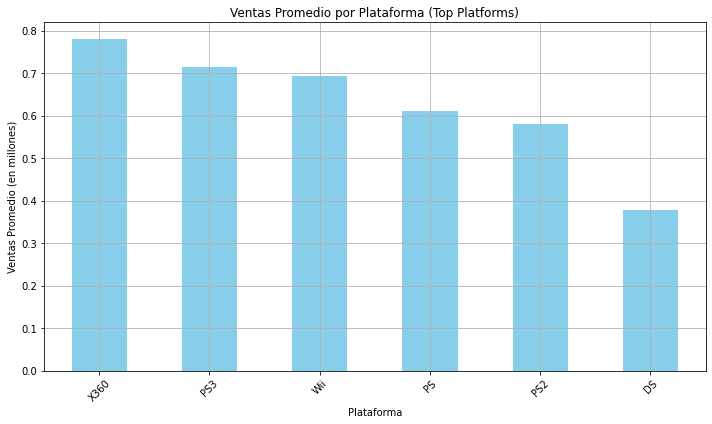

In [101]:
# Filtramos los datos para incluir solo las plataformas con mayores ventas totales
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
filtered_data = games[games['platform'].isin(top_platforms)]

# Calculamos las ventas promedio para cada plataforma
average_sales_by_platform = filtered_data.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

# Creamos una tabla para mostrar las ventas promedio de cada plataforma
print("Ventas Promedio por Plataforma:")
print(average_sales_by_platform)

# Generamos un gráfico de barras para visualizar las ventas promedio de las plataformas
plt.figure(figsize=(10, 6))
average_sales_by_platform.plot(kind='bar', color='skyblue')
plt.title('Ventas Promedio por Plataforma (Top Platforms)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Promedio (en millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

A partir del gráfico podemos ver que las ventas promedio de estas plataformas con alta ventas totales, 
se encuentran en el rango de 0,3 a 0,8 millones de USD.

Aprovechemos de graficar también las ventas promedio de todas las plataformas.

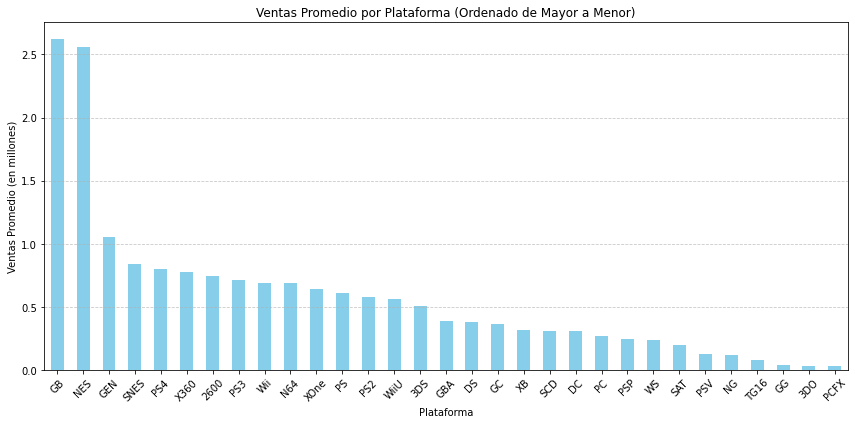

In [102]:
# Calculamos las ventas promedio por plataforma y las ordenamos de mayor a menor
platforms_mean_sales = games.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

# Creamos un gráfico de barras
plt.figure(figsize=(12, 6))
platforms_mean_sales.plot(kind='bar', color='skyblue')
plt.title('Ventas Promedio por Plataforma (Ordenado de Mayor a Menor)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Promedio (en millones)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Al graficar las ventas promedio de todas las plataformas, vemos que hay 3 plataformas que tienen ventas promedio muy superiores al resto. Corresponden a las plataformas GB, NES y GEN, con ventas promedio sobre 1 millón USD. Para todas las demás plataformas, sus ventas promedio son inferiores a 1 millón USD.

A continuación vamos a analizar cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular. Para ello vamos a elegir la plataforma PS2 que es la plataforma con mayores ventas totales. Vamos a generar un gráfico de dispersión y calcular la correlación entre las reseñas y las ventas.

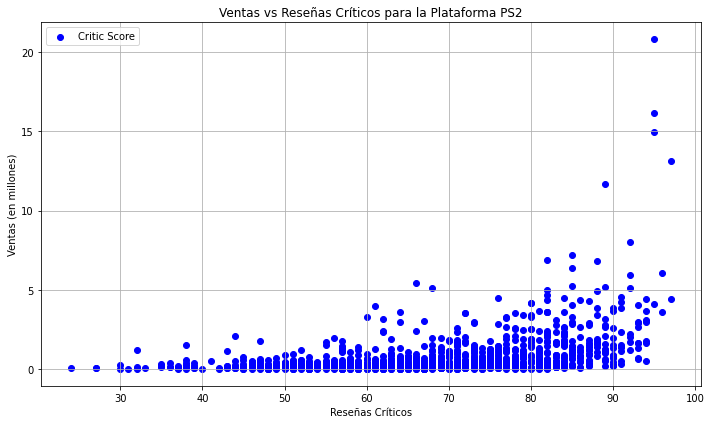

Correlación entre las reseñas de los críticos y las ventas PS2: 0.39253647544509


In [107]:
# Filtramos los datos para la plataforma PS2
platform_PS2cs = games[games['platform'] == 'PS2']

# Eliminamos las filas con valores "Unknown" en la columna critic_score
platform_PS2cs = platform_PS2cs[platform_PS2cs['critic_score'] != "Unknown"]

# Convertimos la columna critic_score a tipo numérico
platform_PS2cs['critic_score'] = pd.to_numeric(platform_PS2cs['critic_score'], errors='coerce')

# Eliminamos las filas con valores NaN en la columna critic_score
platform_PS2cs = platform_PS2cs.dropna(subset=['critic_score'])

# Creamos un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(platform_PS2cs['critic_score'], platform_PS2cs['total_sales'], color='blue', label='Critic Score')
plt.title('Ventas vs Reseñas Críticos para la Plataforma PS2')
plt.xlabel('Reseñas Críticos')
plt.ylabel('Ventas (en millones)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculamos la correlación entre las reseñas y las ventas
correlation_critic = platform_PS2cs['critic_score'].corr(platform_PS2cs['total_sales'])

print("Correlación entre las reseñas de los críticos y las ventas PS2:", correlation_critic)

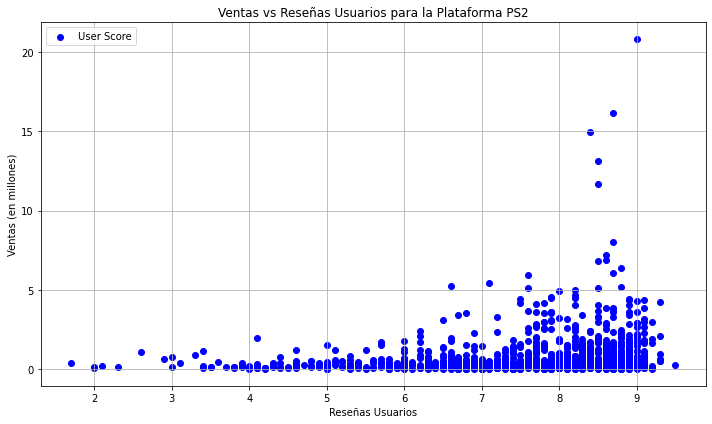

Correlación entre las reseñas de los usuarios y las ventas PS2: 0.1750550277038374


In [108]:
# Filtramos los datos para la plataforma PS2
platform_PS2us = games[games['platform'] == 'PS2']

# Eliminamos las filas con valores "Unknown" en la columna user_score
platform_PS2us = platform_PS2us[platform_PS2us['user_score'] != "Unknown"]

# Convertimos la columna user_score a tipo numérico
platform_PS2us['user_score'] = pd.to_numeric(platform_PS2us['user_score'], errors='coerce')

# Eliminamos las filas con valores NaN en la columna user_score
platform_PS2us = platform_PS2us.dropna(subset=['user_score'])

# Creamos un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(platform_PS2us['user_score'], platform_PS2us['total_sales'], color='blue', label='User Score')
plt.title('Ventas vs Reseñas Usuarios para la Plataforma PS2')
plt.xlabel('Reseñas Usuarios')
plt.ylabel('Ventas (en millones)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculamos la correlación entre las reseñas y las ventas
correlation_user = platform_PS2us['user_score'].corr(platform_PS2us['total_sales'])

print("Correlación entre las reseñas de los usuarios y las ventas PS2:", correlation_user)

Al revisar los gráficos de dispersión y el coeficiente de correlación calculado entre las reseñas (de los críticos y de los usuarios) y las ventas podemos indicar que en ambos casos encontramos una correlación levemente positiva. No es una correlación perfectamente positiva (que sería una correlación con un coeficiente igual a 1) pero al tener el coeficiente un valor positivo mayor que cero, podemos pensar que las reseñas influyen positivamente en las ventas.

Ahora, lo que si podemos indicar es que las reseñas de los críticos pueden tener una mayor influencia en las ventas
debido a que su factor de correlación es cerca de 0,4, en comparación con el factor de correlación de 0,17 que obtuvimos para las reseñas de los usuarios.

A continuación, vamos a proceder a comparar las ventas de los mismos juegos en otras plataformas. Para ello 
tomaremos los juegos de la plataforma PS2. Primero veremos cuales son los juegos más vendidos de esa plataforma.


In [115]:
# Filtramos los datos para incluir solo los juegos de la plataforma PS2
games_PS2 = games[games['platform'] == 'PS2']

# Luego identificamos los juegos más vendidos en la plataforma PS2
top_games_PS2 = games_PS2.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(10)

# Imprimimos los juegos más vendidos en la plataforma PS2
print("Los juegos más vendidos en la plataforma PS2 son:")
print(top_games_PS2)

# Luego filtramos los datos para incluir solo los juegos que se venden en otras plataformas
other_platforms = games[games['name'].isin(top_games_PS2.index) & (games['platform'] != 'PS2')]

# Imprimimos los juegos que se venden en otras plataformas
print("\nLos juegos que se venden en otras plataformas son:")
print(other_platforms[['name', 'platform']].drop_duplicates())

Los juegos más vendidos en la plataforma PS2 son:
name
Grand Theft Auto: San Andreas    20.81
Grand Theft Auto: Vice City      16.15
Gran Turismo 3: A-Spec           14.97
Grand Theft Auto III             13.10
Gran Turismo 4                   11.65
Final Fantasy X                   8.04
Need for Speed Underground        7.20
Need for Speed Underground 2      6.90
Medal of Honor: Frontline         6.84
Kingdom Hearts                    6.40
Name: total_sales, dtype: float64

Los juegos que se venden en otras plataformas son:
                                name platform
687     Need for Speed Underground 2       XB
864    Grand Theft Auto: San Andreas       XB
1007                  Kingdom Hearts      PS3
1034      Need for Speed Underground       XB
1255       Medal of Honor: Frontline       XB
1644      Need for Speed Underground       GC
1780    Need for Speed Underground 2       GC
2090   Grand Theft Auto: San Andreas       PC
3340       Medal of Honor: Frontline       GC
4410    N

Ahora conocemos cuales son los juegos más vendidos de la plataforma PS2 y además sabemos cuales de ellos también se venden en otras plataformas. Analicemos primero el juego más vendido en la plataforma PS2, el juego llamado "Grand Theft Auto: San Andreas". Vamos a ver como es su venta en otras plataformas.


Plataformas en las que se vende el juego 'Grand Theft Auto: San Andreas':
platform
PC       0.97
PS2     20.81
X360     0.11
XB       1.96
Name: total_sales, dtype: float64


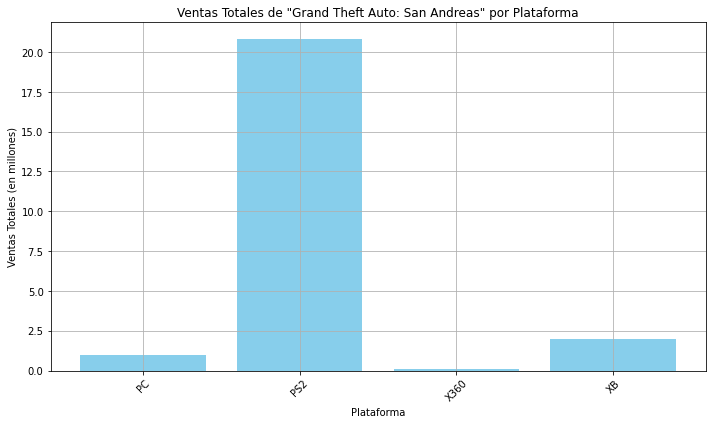

In [116]:
# Filtramos los datos para incluir solo las filas correspondientes al juego "Grand Theft Auto: San Andreas"
gta_san_andreas = games[games['name'] == 'Grand Theft Auto: San Andreas']

# Creamos una tabla que indique en qué plataformas se vende el juego
platforms_sa = gta_san_andreas.groupby('platform')['total_sales'].sum()

# Imprimimos la tabla
print("Plataformas en las que se vende el juego 'Grand Theft Auto: San Andreas':")
print(platforms_sa)

# Generamos un gráfico de las ventas totales del juego por plataforma para ver los resultados.
plt.figure(figsize=(10, 6))
plt.bar(platforms_sa.index, platforms_sa.values, color='skyblue')
plt.title('Ventas Totales de "Grand Theft Auto: San Andreas" por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Vemos que si bien el juego "Grand Theft Auto: San Andreas" es vendido en otras 3 plataformas, la venta en otras plataformas es muchísima más baja que las ventas en la plataforma PS2.

Ahora analicemos las ventas de otro juego, vamos a elegir el juego "Need for Speed Underground 2", que es un juego que se vende en más plataformas.

Plataformas en las que se vende el juego 'Need for Speed Underground 2':
platform
DS     0.14
GBA    0.44
GC     1.13
PC     0.07
PS2    6.90
XB     2.28
Name: total_sales, dtype: float64


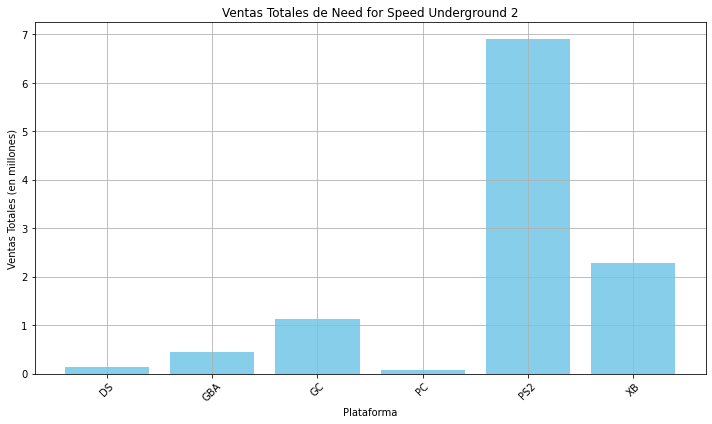

In [117]:
# Filtramos los datos para incluir solo las filas correspondientes al juego "'Need for Speed Underground 2"
gta_nfs = games[games['name'] == 'Need for Speed Underground 2']

# Creamos una tabla que indique en qué plataformas se vende el juego
platforms_nfs = gta_nfs.groupby('platform')['total_sales'].sum()

# Imprimimos la tabla
print("Plataformas en las que se vende el juego 'Need for Speed Underground 2':")
print(platforms_nfs)

# Crear un gráfico de las ventas totales del juego por plataforma
plt.figure(figsize=(10, 6))
plt.bar(platforms_nfs.index, platforms_nfs.values, color='skyblue')
plt.title('Ventas Totales de Need for Speed Underground 2')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

En este caso, vemos que para el juego 'Need for Speed Underground 2' las ventas en las otras plataformas también son más bajas en comparación con las ventas en la plataforma PS2.

Analicemos que ocurre con los juegos de otra plataforma, por ejemplo tomemos la plataforma con la segunda cantidad de ventas, que corresponde a la plataforma X360. Veamos si para sus juegos más vendidos ocurre algo similar de que son más vendidos en su plataforma que en las demás.

Para ello, al igual que para la plataforma PS2, filtraremos los juegos más vendidos en la X360, y buscaremos en que otras plataformas son vendidos.

In [118]:
# Primero filtramos los datos para incluir solo los juegos de la plataforma X360
games_X360 = games[games['platform'] == 'X360']

# Identificamos los juegos más vendidos en la plataforma X360
top_games_X360 = games_X360.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(10)

# Imprimimos los juegos más vendidos en la plataforma X360
print("Los juegos más vendidos en la plataforma X360 son:")
print(top_games_X360)

# Filtramos los datos para incluir solo los juegos que se venden en otras plataformas
other_platforms_x360 = games[games['name'].isin(top_games_X360.index) & (games['platform'] != 'X360')]

# Imprimimos los juegos que se venden en otras plataformas
print("\nLos juegos que se venden en otras plataformas son:")
print(other_platforms_x360[['name', 'platform']].drop_duplicates())

Los juegos más vendidos en la plataforma X360 son:
name
Kinect Adventures!                21.82
Grand Theft Auto V                16.27
Call of Duty: Modern Warfare 3    14.73
Call of Duty: Black Ops           14.62
Call of Duty: Black Ops II        13.68
Call of Duty: Modern Warfare 2    13.47
Halo 3                            12.12
Grand Theft Auto IV               11.00
Call of Duty: Ghosts              10.24
Halo: Reach                        9.86
Name: total_sales, dtype: float64

Los juegos que se venden en otras plataformas son:
                                name platform
16                Grand Theft Auto V      PS3
34        Call of Duty: Black Ops II      PS3
37    Call of Duty: Modern Warfare 3      PS3
41           Call of Duty: Black Ops      PS3
42                Grand Theft Auto V      PS4
55    Call of Duty: Modern Warfare 2      PS3
57               Grand Theft Auto IV      PS3
69              Call of Duty: Ghosts      PS3
165               Grand Theft Auto V     XOn

Vamos a elegir el juego llamado "Call of Duty: Ghosts" porque vemos que este juego se vende en varias otras plataformas.

Plataformas en las que se vende el juego 'Call of Duty: Ghosts':
platform
PC       0.69
PS3      9.36
PS4      3.83
WiiU     0.35
X360    10.24
XOne     2.92
Name: total_sales, dtype: float64


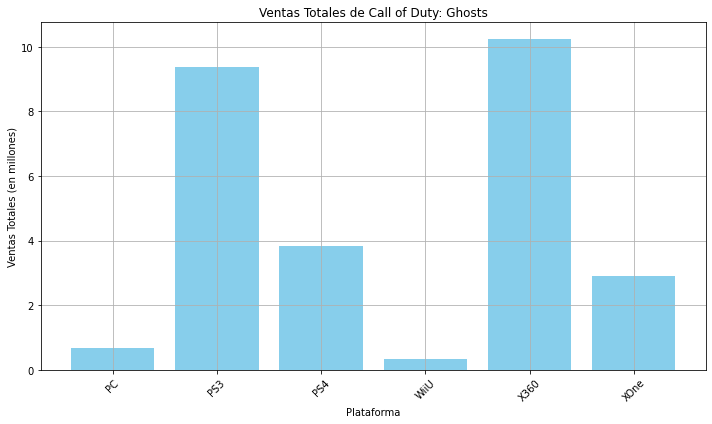

In [119]:
# Filtramos los datos para incluir solo las filas correspondientes al juego "Call of Duty: Ghosts"
x360_codg = games[games['name'] == 'Call of Duty: Ghosts']

# Creamos una tabla que indique en qué plataformas se vende el juego
platforms_codg = x360_codg.groupby('platform')['total_sales'].sum()

# Imprimimos la tabla
print("Plataformas en las que se vende el juego 'Call of Duty: Ghosts':")
print(platforms_codg)

# Creamos un gráfico de las ventas totales del juego por plataforma
plt.figure(figsize=(10, 6))
plt.bar(platforms_codg.index, platforms_codg.values, color='skyblue')
plt.title('Ventas Totales de Call of Duty: Ghosts')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Vemos que para este juego, la plataforma donde más se vende es la X360, pero hay otras plataformas en las cuales sus ventas son importantes, como la plataforma PS3 y la la plataforma PS4. 

Podríamos concluir entonces que algunos juegos que son muy vendidos en una sola plataforma, sin embargo hay otros juegos (como el juego 'Call of Duty: Ghosts') que son juegos multiplaforma, porque son vendidos de manera importante por varias plataformas.

A continuación vamos a proceder a analizar la distribución general de los juegos por género. Para ello vamos a analizar primero la cantidad de juegos por genero, también vamos a analizar las ventas totales por género.

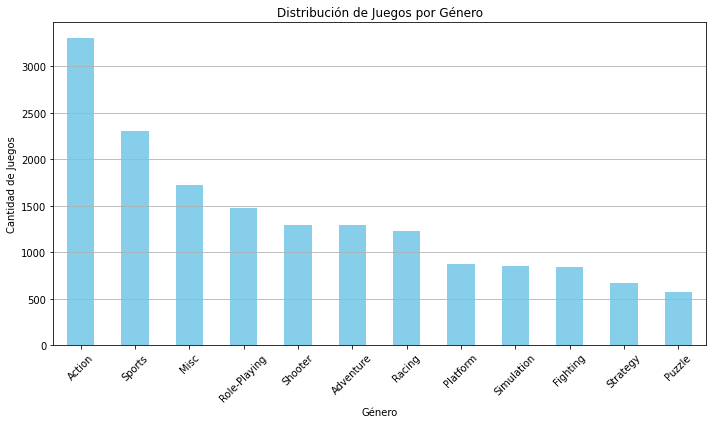

In [120]:
# Primero contamos la cantidad de juegos en cada género
genre_counts = games['genre'].value_counts()

# Creamos un gráfico de barras para visualizar la distribución de los juegos por género
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Juegos por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Del gráfico vemos que los géneros de Acción, Deportes y Misceláneos y Role Playing son los que 
tienen más juegos. Podemos graficar esa misma información ocupando un gráfico de torta.


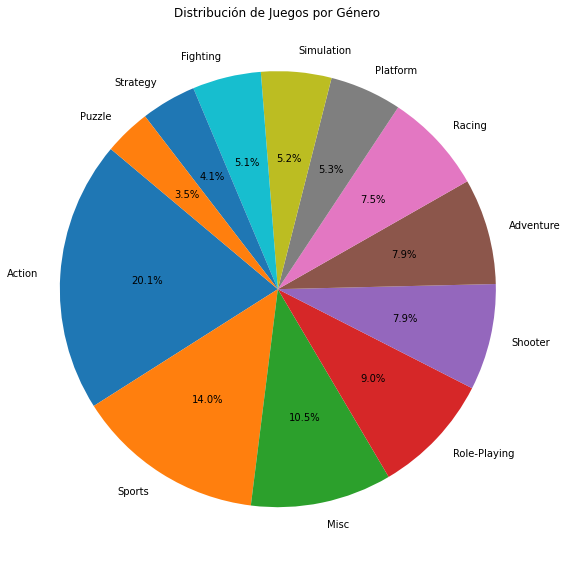

In [121]:
# Contamos la cantidad de juegos en cada género
genre_counts = games['genre'].value_counts()

# Creamos un gráfico circular para visualizar la distribución de los juegos por género
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Juegos por Género')
plt.axis('equal')
plt.tight_layout()
plt.show()

En base al gráfico de tortas, podemos indicar que los géneros de Acción, Deportes y Misceláneos y Role Playing superan el 50% de los juegos.

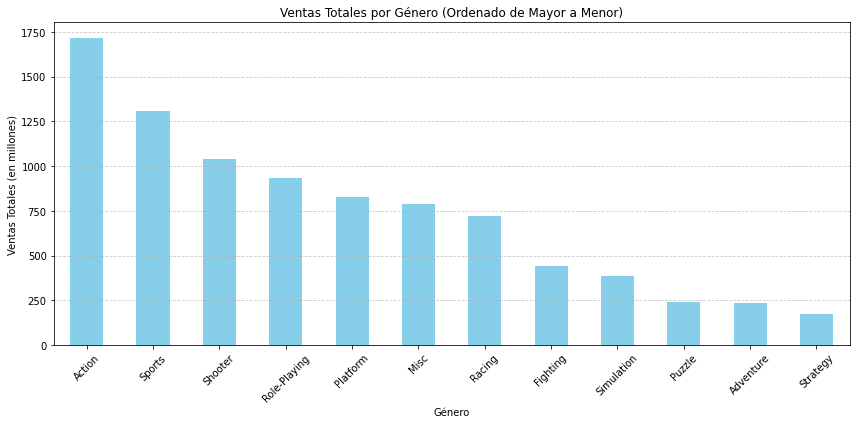

In [122]:
# A continuación calculamos las ventas totales por genero y las ordenamos de mayor a menor
platforms_mean_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Creamos un gráfico de barras
plt.figure(figsize=(12, 6))
platforms_mean_sales.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Género (Ordenado de Mayor a Menor)')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Del gráfico de Ventas Totales por Género, vemos que los géneros los 3 principales géneros corresponden 
a los géneros de Acción, Deportes y Shooter, cada uno de los cuales supera ventas sobre 1.000 millones de USD.

A continuación vamos a analizar la evolución de los géneros principales (con mayores ventas) a lo largo de los años. 

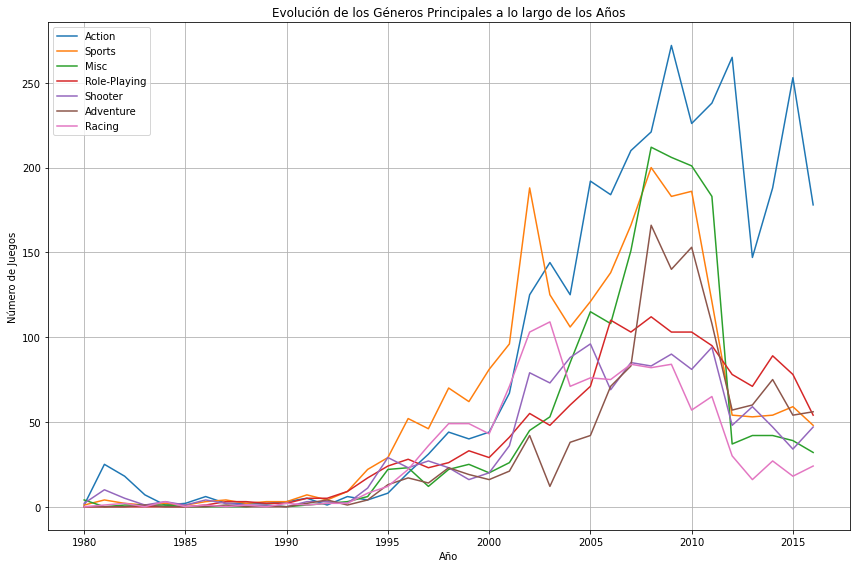

In [123]:
# Agrupamos por año y género y contamos el número de juegos de cada género en cada año
genre_counts = games.groupby(['year_of_release', 'genre']).size().unstack(fill_value=0)

# Filtramos el DataFrame para incluir solo los géneros principales con mayores ventas
selected_genres = ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing']
genre_counts_selected = genre_counts[selected_genres]

# Creamos un gráfico de líneas
plt.figure(figsize=(12, 8))

# Posteriormente iteramos sobre cada género seleccionado y agregamos una línea de tendencia para cada uno
for genre in genre_counts_selected.columns:
    plt.plot(genre_counts_selected.index, genre_counts_selected[genre], label=genre)

# Agregamos las etiquetas de ejes y un título
plt.xlabel('Año')
plt.ylabel('Número de Juegos')
plt.title('Evolución de los Géneros Principales a lo largo de los Años')
plt.legend()

# Mostramos el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

Del gráfico de evolución de los géneros por año podemos indicar que los juegos de acción han sido durante los últimos 10 años los juegos que tienen mayor número de lanzamientos al año. En los últimos años, los lanzamientos de los juegos de Role-Playing han sido el segundo género de juegos, después de los juegos de acción, con mayores lanzamientos al año.

Conclusiones Paso 3: 

Hemos analizado el conjunto de datos de los video juegos en función de los años de lanzamiento, de las ventas por plataforma y por género, además de analizar las correlaciones con las reseñas de los críticos y usuarios para las plataformas con mayores ventas, realizando comentarios de los resultados obtenidos en cada uno de esos análisis.

Vemos que en general la industria de los videojuegos en un mercado en constante evolución y que actualmente hay varias plataformas que deberían continuar con su venta en los próximos años, siendo los juegos de acción los juegos que más han sido lanzados en los últimos años, y que se deben considerar las reseñas de los críticos y los usuarios las cuales tienen una influencia positiva en las ventas.

# Paso 4. Perfil de usuario para cada región.

Primero para cada región (América del Norte, Europa y Japón) vamos a identificar las 5 plataformas principales y sus respetivas cuotas de mercado.

Para realizar esta tarea, vamos a definir una función que llamaremos "market_share" la cual luego ocuparemos para cada región.

In [124]:
def market_share(region):
    # Seleccionar las ventas de la región especificada
    if region == 'na':
        region_sales = games['na_sales']
    elif region == 'eu':
        region_sales = games['eu_sales']
    elif region == 'jp':
        region_sales = games['jp_sales']
    else:
        return "Región no válida"
    
    # Calcular las ventas totales en la región
    total_sales = region_sales.sum()
    
    # Calcular las ventas de las cinco plataformas principales en la región
    top_platforms = games[['platform', region + '_sales']].groupby('platform').sum().sort_values(by=region + '_sales', ascending=False).head(5)
    
    # Calcular la cuota de mercado de cada plataforma
    market_share = (top_platforms / total_sales) * 100
    
    # Concatenar las ventas y las cuotas de mercado en una tabla
    market_data = pd.concat([top_platforms, market_share], axis=1)
    market_data.columns = ['Ventas', 'Cuota de Mercado']
    
    return market_data

# Utilizamos la función para la región NA
market_share_na = market_share('na')
print("Ventas y Cuota de Mercado de las 5 Plataformas Principales en América del Norte:")
print(market_share_na)
print('-----------------')

# Utilizamos la función para la región EU
market_share_eu = market_share('eu')
print("Ventas y Cuota de Mercado de las 5 Plataformas Principales en Europa:")
print(market_share_eu)
print('-----------------')

# Utilizamos la función para la región JP
market_share_jp = market_share('jp')
print("Ventas y Cuota de Mercado de las 5 Plataformas Principales en Japón:")
print(market_share_jp)
print('-----------------')

Ventas y Cuota de Mercado de las 5 Plataformas Principales en América del Norte:
          Ventas  Cuota de Mercado
platform                          
X360      595.74         13.722238
PS2       572.92         13.196604
Wii       486.87         11.214533
PS3       390.13          8.986230
DS        380.31          8.760037
-----------------
Ventas y Cuota de Mercado de las 5 Plataformas Principales en Europa:
          Ventas  Cuota de Mercado
platform                          
PS2       332.63         13.861432
PS3       327.21         13.635568
X360      268.32         11.181491
Wii       258.32         10.764769
PS        212.39          8.850763
-----------------
Ventas y Cuota de Mercado de las 5 Plataformas Principales en Japón:
          Ventas  Cuota de Mercado
platform                          
DS        175.02         13.560714
PS        139.78         10.830286
PS2       137.54         10.656728
SNES      116.55          9.030404
3DS       100.62          7.796132
---------

Al revisar las ventas por plataforma y cuota de mercado en cada una de las regiones, vemos que las regiones de América del Norte y Europa, poseen las mismas 4 plataformas con mayores ventas ordenadas de manera distinta, las que corresponen a X360, PS2, PS3 y Wii. 

Con respecto al mercado de Japón, las plataformas con mayores números de ventas son distintas a los otros dos mercados, siendo la plataforma DS la más popular.

A continuación vamos a realizar un análisis similar, pero con los 5 géneros principales de cada región.

In [125]:
def market_share_genre(region):
    # Seleccionar las ventas de la región especificada
    if region == 'na':
        region_sales = games['na_sales']
    elif region == 'eu':
        region_sales = games['eu_sales']
    elif region == 'jp':
        region_sales = games['jp_sales']
    else:
        return "Región no válida"
    
    # Calcular las ventas totales en la región
    total_sales = region_sales.sum()
    
    # Calcular las ventas de los cinco géneros principales en la región
    top_genres = games[['genre', region + '_sales']].groupby('genre').sum().sort_values(by=region + '_sales', ascending=False).head(5)
    
    # Calcular la cuota de mercado de cada género
    market_share = (top_genres / total_sales) * 100
    
    # Concatenar las ventas y las cuotas de mercado en una tabla
    market_data = pd.concat([top_genres, market_share], axis=1)
    market_data.columns = ['Ventas', 'Cuota de Mercado']
    
    return market_data

# Utilizamos la función para la región NA
market_share_genre_na = market_share_genre('na')
print("Ventas y Cuota de Mercado de los 5 Géneros Principales en América del Norte:")
print(market_share_genre_na)
print('-----------------')

# Utilizamos la función para la región EU
market_share_genre_eu = market_share_genre('eu')
print("Ventas y Cuota de Mercado de los 5 Géneros Principales en Europa:")
print(market_share_genre_eu)
print('-----------------')

# Utilizamos la función para la región JP
market_share_genre_jp = market_share_genre('jp')
print("Ventas y Cuota de Mercado de los 5 Géneros Principales en Japón:")
print(market_share_genre_jp)
print('-----------------')

Ventas y Cuota de Mercado de los 5 Géneros Principales en América del Norte:
          Ventas  Cuota de Mercado
genre                             
Action    863.17         19.882204
Sports    671.20         15.460379
Shooter   584.83         13.470938
Platform  444.44         10.237203
Misc      399.57          9.203671
-----------------
Ventas y Cuota de Mercado de los 5 Géneros Principales en Europa:
         Ventas  Cuota de Mercado
genre                            
Action   510.99         21.294089
Sports   371.33         15.474147
Shooter  314.52         13.106748
Racing   234.49          9.771720
Misc     210.60          8.776170
-----------------
Ventas y Cuota de Mercado de los 5 Géneros Principales en Japón:
              Ventas  Cuota de Mercado
genre                                 
Role-Playing  353.39         27.380989
Action        160.14         12.407798
Sports        134.93         10.454503
Platform      130.71         10.127534
Misc          107.02          8.292010


Con respecto a las ventas por género, las regiones de América del Norte y Europa poseen los mismos 3 géneros más populares, que son Acción, Deportes y Shooter, ordenados en el mismo orden. Siendo el género de Acción el más popular.


Sin embargo, para la región de Japón, el juego más popular corresponde al género de Role-Playing, dejando en segundo y tercer lugar a los géneros de Acción y Deportes respectivamente.


A continuación vamos a analizar si las clasificaciones de ESRB, que se encuentran en la columna "rating", afectan a las ventas en regiones individuales. Para ello tomaremos para cada región la plataforma con mayores ventas y calcularemos la correlación.

Por lo tanto, para América del Norte tomaremos la plataforma X360, para Europa la plataforma PS2 y para Japón la plataforma DS.

In [126]:
# Primero filtramos los datos para la región de NA y la plataforma X360
na_x360_data = games[(games['platform'] == 'X360') & (games['rating'] != 'Unknown')]

# Calcular la correlación entre la clasificación ESRB y las ventas
# Esta vez ocupamos el método astype('category') para convertir la serie de clasificaciones ESRB 
# en una variable categórica antes de calcular la correlación. 
# Esto se debe a que las clasificaciones ESRB son variables categóricas y no numéricas.
correlation = na_x360_data['rating'].astype('category').cat.codes.corr(na_x360_data['na_sales'])
print("Correlación entre Clasificación ESRB y Ventas en América del Norte para la Plataforma X360:", correlation)

Correlación entre Clasificación ESRB y Ventas en América del Norte para la Plataforma X360: 0.005189314771418992


In [127]:
# Ahora filtramos los datos para la región de UE y la plataforma PS2
eu_ps2_data = games[(games['platform'] == 'PS2') & (games['rating'] != 'Unknown')]

# Calculamos la correlación entre la clasificación ESRB y las ventas
correlation_eu_ps2 = eu_ps2_data['rating'].astype('category').cat.codes.corr(eu_ps2_data['eu_sales'])
print("Correlación entre Clasificación ESRB y Ventas en Europa para la Plataforma PS2:", correlation_eu_ps2)

Correlación entre Clasificación ESRB y Ventas en Europa para la Plataforma PS2: 0.0039030236253875267


In [128]:
# Filtrar los datos para la región de JP y la plataforma DS
jp_ds_data = games[(games['platform'] == 'DS') & (games['rating'] != 'Unknown')]

# Calcular la correlación entre la clasificación ESRB y las ventas
correlation_jp_ds = jp_ds_data['rating'].astype('category').cat.codes.corr(jp_ds_data['jp_sales'])
print("Correlación entre Clasificación ESRB y Ventas en Japón para la Plataforma DS:", correlation_jp_ds)

Correlación entre Clasificación ESRB y Ventas en Japón para la Plataforma DS: -0.015137370523188327


Al calcular la correlaciones entre lsa clasificación ESRB y las ventas por plataforma en cada región, vemos que prácticamente casi no existe correlación, con valores cercanos a cero para América del Norte y Europa. Para el caso de Japón incluso existe una correlación cercana a cero y negativa.

Ahora realizemos el mismo análisis pero considerando ahora las ventas por género. Para ello tomaremos el género de Acción, que corresponde al género de mayores ventas de América del Norte y Europa, y es el segundo género con mayores ventas de Japón.

In [129]:
# Filtramos los datos para la región de NA y el género de Acción
na_action_data = games[(games['genre'] == 'Action') & (games['rating'] != 'Unknown')]

# Calculamos la correlación entre la clasificación ESRB y las ventas
correlation = na_action_data['rating'].astype('category').cat.codes.corr(na_action_data['na_sales'])
print("Correlación entre Clasificación ESRB y Ventas en América del Norte para el género Acción:", correlation)

# Filtramos los datos para la región de UE y el género de acción
eu_action_data = games[(games['genre'] == 'Action') & (games['rating'] != 'Unknown')]

# Calculamos la correlación entre la clasificación ESRB y las ventas
correlation_eu_action = eu_action_data['rating'].astype('category').cat.codes.corr(eu_action_data['eu_sales'])
print("Correlación entre Clasificación ESRB y Ventas en Europa el género Acción:", correlation_eu_action)

# Filtramos los datos para la región de JP y el género Acción
jp_action_data = games[(games['genre'] == 'Action') & (games['rating'] != 'Unknown')]

# Calculamos la correlación entre la clasificación ESRB y las ventas
correlation_jp_action = jp_action_data['rating'].astype('category').cat.codes.corr(jp_action_data['jp_sales'])
print("Correlación entre Clasificación ESRB y Ventas en Japón para el género de Acción:", correlation_jp_action)

Correlación entre Clasificación ESRB y Ventas en América del Norte para el género Acción: 0.029665161907677054
Correlación entre Clasificación ESRB y Ventas en Europa el género Acción: 0.05910115358030061
Correlación entre Clasificación ESRB y Ventas en Japón para el género de Acción: 0.10775723979267611


Al calcular la correlaciones entre la clasificación ESRB y las ventas por el género de Acción en cada región, vemos que las correlaciones son bajas pero superiores a las correlaciones con respecto a las ventas por plataforma.
Incluso para el caso de Japón, tenemos una correlación de 0,1 entre las clasificaciones y las ventas del género de Acción. 

La clasificación ESRB evalúa el contenido de un juego y asigna una clasificación de edad, como Adolescente o Adulto, a cada juego. Por lo tanto, puede ser que por ese motivo sea más alta la correlación de esta clasificación ESRB con las ventas del género de cada juego, pensando en que algunos géneros tienen un público objetivo de edad distinto de otro.



Conclusiones Paso 4:

Como conclusiones generales del análisis de los perfiles de usuarios por región podemos indicar que los usuarios de las regiones de América del Norte y Europa tienen comportamientos muy similares, porque comparten las mayores ventas en las mismas plataformas y en los mismos géneros. 

Un comportamiento muy distinto corresponde a los usuarios de la región de Japón, los cuales tienen un comportamiento distinto tanto en las ventas de plataformas como los géneros. A diferencia de Europa y de América del Norte donde el favorito es el género de acción, el género favorito es por lejos el género de Role-Playing. Esta diferencia se puede basar en la distinta cultura del puebo japonés en comparación con una cultura más occidental de Europa y América del Norte.

# Paso 5. Pruebas de hipótesis

Primero vamos a analizar si las calificaciones de los usuarios para las plataformas Xbox One y PC son las mismas.

Necesitamos establecer el valor de umbral alfa, que corresponde al nivel de significancia que utilizamos para evaluar la evidencia en contra de la hipótesis nula. Es el nivel de probabilidad que estamos dispuestos a aceptar como evidencia suficiente para rechazar la hipótesis nula. Vamos a considerar un valor comúnmente utilizado para α de 0.05, lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de cometer un error tipo I, es decir, rechazar incorrectamente la hipótesis nula cuando es verdadera.

Para esta prueba de hipótesis, vamos a definir las siguientes Hipótesis nula e Hipótesis alternativa: 

Hipótesis nula (H0): Las calificaciones de los usuarios para las plataformas Xbox One y PC son iguales.

Hipótesis alternativa (H1): Las calificaciones de los usuarios para las plataformas Xbox One y PC son diferentes.

Para probar estas hipótesis, utilizaremos una prueba de diferencia de medias, específicamente la prueba t de Student independiente para dos muestras. Esta prueba compara las medias de dos grupos independientes para determinar si existen diferencias significativas entre ellos.

La razón por la que elegimos esta prueba es porque queremos comparar las calificaciones de los usuarios entre dos plataformas diferentes (Xbox One y PC). La prueba t de Student nos permite determinar si estas diferencias en las medias son estadísticamente significativas, es decir, si son lo suficientemente grandes como para descartar la posibilidad de que sean debidas al azar.

In [130]:
# Convertir los valores "Unknown" a NaN en la columna user_score
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

# Filtrar los datos para las plataformas Xbox One y PC excluyendo los valores NaN en user_score
xbox_one_scores = games[(games['platform'] == 'XOne') & (~games['user_score'].isna())]['user_score']
pc_scores = games[(games['platform'] == 'PC') & (~games['user_score'].isna())]['user_score']

# Realizar la prueba de hipótesis
alpha = 0.05  # Valor de umbral alfa
results = st.ttest_ind(xbox_one_scores, pc_scores, equal_var = False)

# Imprimir el resultado de la prueba
print('valor p: ', results.pvalue)

# Comparar el valor p con el valor de umbral alfa
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para concluir que las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")

valor p:  4.5385802963771776e-06
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.


Aplicamos la prueba de hipótesis y rechazamos la hipótesis nula, por lo que Las calificaciones de los usuarios para Xbox One y PC son diferentes. 

Ahora vamos a analziar si las calificaciones de los usuarios para los géneros de Acción y Deportes son diferentes.
Definimos las siguientes hipótesis nula y alternativa.
Hipótesis nula (H0): Las calificaciones de los usuarios para los géneros de Acción y Deportes son iguales.
Hipótesis alternativa (H1): Las calificaciones de los usuarios para los géneros de Acción y Deportes son diferentes.
Vamos a utilizar la misma prueba t de Student independiente para dos muestras.

In [132]:
# Convertir los valores "Unknown" a NaN en la columna user_score
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

# Filtrar los datos para los géneros de Acción y Deportes excluyendo los valores NaN en user_score
accion_scores = games[(games['genre'] == 'Action') & (~games['user_score'].isna())]['user_score']
deportes_scores = games[(games['genre'] == 'Sports') & (~games['user_score'].isna())]['user_score']

# Realizamos la prueba de hipótesis
alpha = 0.05  # Valor de umbral alfa
results = st.ttest_ind(accion_scores, deportes_scores, equal_var=False)

# Imprimir el resultado de la prueba
print('valor p: ', results.pvalue)

# Comparamos el valor p con el valor de umbral alfa
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones de los usuarios para los géneros de Acción y Deportes son diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para concluir que las calificaciones de los usuarios para los géneros de Acción y Deportes son diferentes.")

valor p:  0.07370217419278534
No rechazamos la hipótesis nula: No hay suficiente evidencia para concluir que las calificaciones de los usuarios para los géneros de Acción y Deportes son diferentes.


Al aplicamos la prueba de hipótesis y el resultado nos indica que no rechazamos la hipótesis nula.

# Paso 6. Conclusión general.

Como conclusión general podemos indicar que la industria de los videojuegos es un mercado muy dinámico debido a que siempre están apareciendo nuevas plataformas y nuevos juegos, los que mueven muchos millones de dólares en todo el mundo desde hace muchos años. 


En particular para el conjunto de datos estudiados, podemos ver todo el desarrollo y éxito de las primeras plataformas de los distintos fabricantes, como PS, PS2 y PS3 de Sony, X360 de Microsoft  y la Wii de Nintendo, las cuales fueron líderes cada una de ellas, en las ventas de videojuegos, por alrededor de 10 años.


También podemos ver como las clasificaciones de los críticos y los usuarios  influyen positivamente en las ventas de las distintas plataformas, además de que el género de acción sigue siendo el líder en las ventas en casi todas las regiones.
En base a los datos analizados, también podemos proyectar que continuarán las ventas para los años siguientes de los juegos de las plataformas recientemente lanzadas, como la PS4 y la XOne.

Además de que seguirán las ventas de juegos más populares en multiplataformas, como el juego Call of Duty: Ghosts.


También en los próximos años seguirán las ventas de los juegos a través de la plataforma PC; debido a que estas ventas están asociadas a la venta de computadores, los cuales en muchos casos se ocupan también para otra función como el estudio o el trabajo, además de ser una plataforma de juegos.

Por último, podemos proyectar de que la industria de los videojuegos va a desarrollarse mucho también de la mano del desarrollo y penetración de los dispositivos móviles como los teléfonos celulares. Este desarrollo permitirá no solamente una diversificación considerable de la industria de los videojuegos, sino un aumento en las posibilidades de llegar a nuevos públicos y regiones. 

Por ejemplo el incremento de los conocidos como videojuegos casuales, que corresponden a los que se pueden jugar en cualquier teléfono celular, va a provocar que muchos usuarios se decante por esta nueva forma de entretenimiento a nivel mundial.
